# IMPORT

In [270]:
import pandas                           as pd
import seaborn                          as sns
import warnings

from sklearn.cluster                    import KMeans
from matplotlib                         import pyplot as plt
from sklearn.metrics                    import silhouette_score
from sklearn.preprocessing              import StandardScaler
from matplotlib                         import colors
from factor_analyzer                    import FactorAnalyzer
from factor_analyzer.factor_analyzer    import calculate_bartlett_sphericity
from geopy.distance                     import geodesic

warnings.filterwarnings('ignore')

# LOADING DATASET

In [187]:
df = pd.read_csv('Datasets/sao_paulo_prices_2019.csv')

# ANÁLISE EXPLORATÓRIA

In [188]:
df.sample(10)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
8681,220000,100,45,2,1,0,1,0,0,0,0,Jaçanã/São Paulo,sale,apartment,-23.462734,-46.575959
7750,680000,650,81,3,2,1,2,1,1,1,0,Freguesia do Ó/São Paulo,sale,apartment,-23.492523,-46.694040
5882,1360000,1100,126,3,5,3,3,1,1,1,0,Vila Guilherme/São Paulo,sale,apartment,-23.505594,-46.601941
1594,4000,2600,170,3,4,1,2,0,0,1,0,Alto de Pinheiros/São Paulo,rent,apartment,-23.541828,-46.718899
8213,600000,1000,149,3,1,0,0,0,0,0,0,Bom Retiro/São Paulo,sale,apartment,-23.530552,-46.637723
3337,1450,587,50,2,2,1,1,0,0,0,0,Cambuci/São Paulo,rent,apartment,-23.564134,-46.628345
10283,1900,160,76,2,1,0,0,0,0,0,0,Bom Retiro/São Paulo,rent,apartment,0.000000,0.000000
11983,300000,380,60,1,1,0,0,1,1,0,0,Bela Vista/São Paulo,sale,apartment,-23.557981,-46.644067
4188,1800,1100,100,3,2,1,3,0,0,1,0,Vila Sônia/São Paulo,rent,apartment,-23.601361,-46.725677
7908,239000,0,43,2,2,1,1,0,0,0,0,Perus/São Paulo,sale,apartment,-23.406884,-46.737037


In [189]:
df.columns

Index(['Price', 'Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking',
       'Elevator', 'Furnished', 'Swimming Pool', 'New', 'District',
       'Negotiation Type', 'Property Type', 'Latitude', 'Longitude'],
      dtype='object')

In [190]:
# valores nulos
df.isnull().sum()

Price               0
Condo               0
Size                0
Rooms               0
Toilets             0
Suites              0
Parking             0
Elevator            0
Furnished           0
Swimming Pool       0
New                 0
District            0
Negotiation Type    0
Property Type       0
Latitude            0
Longitude           0
dtype: int64

In [191]:
# tipos dos dados
df.dtypes

Price                 int64
Condo                 int64
Size                  int64
Rooms                 int64
Toilets               int64
Suites                int64
Parking               int64
Elevator              int64
Furnished             int64
Swimming Pool         int64
New                   int64
District             object
Negotiation Type     object
Property Type        object
Latitude            float64
Longitude           float64
dtype: object

In [192]:
# tamanho do dataset
print(f'Número de registros: {df.shape[0]}')
print(f'Número de features: {df.shape[1]}')

Número de registros: 13640
Número de features: 16


#### Variáveis Numéricas

In [193]:
df_num = df.select_dtypes(include='number')
df_cat = df.select_dtypes(exclude='number')

In [194]:
df_num['Price'].min()

480

In [195]:
# descrição das variáveis
df_num.describe()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude
count,1.364000e+04,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.00000,13640.000000,13640.000000,13640.000000
mean,2.877378e+05,689.882331,84.373900,2.312023,2.073680,0.980792,1.393182,0.354179,0.146774,0.51217,0.015616,-22.077047,-43.597088
std,5.908214e+05,757.649363,58.435676,0.777461,0.961803,0.834891,0.829932,0.478281,0.353894,0.49987,0.123988,5.866633,11.487288
min,4.800000e+02,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-46.749039,-58.364352
25%,1.858750e+03,290.000000,50.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,-23.594552,-46.681671
50%,8.100000e+03,500.000000,65.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.00000,0.000000,-23.552813,-46.637255
75%,3.600000e+05,835.000000,94.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.00000,0.000000,-23.517640,-46.560040
max,1.000000e+07,9500.000000,880.000000,10.000000,8.000000,6.000000,9.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000


<AxesSubplot:>

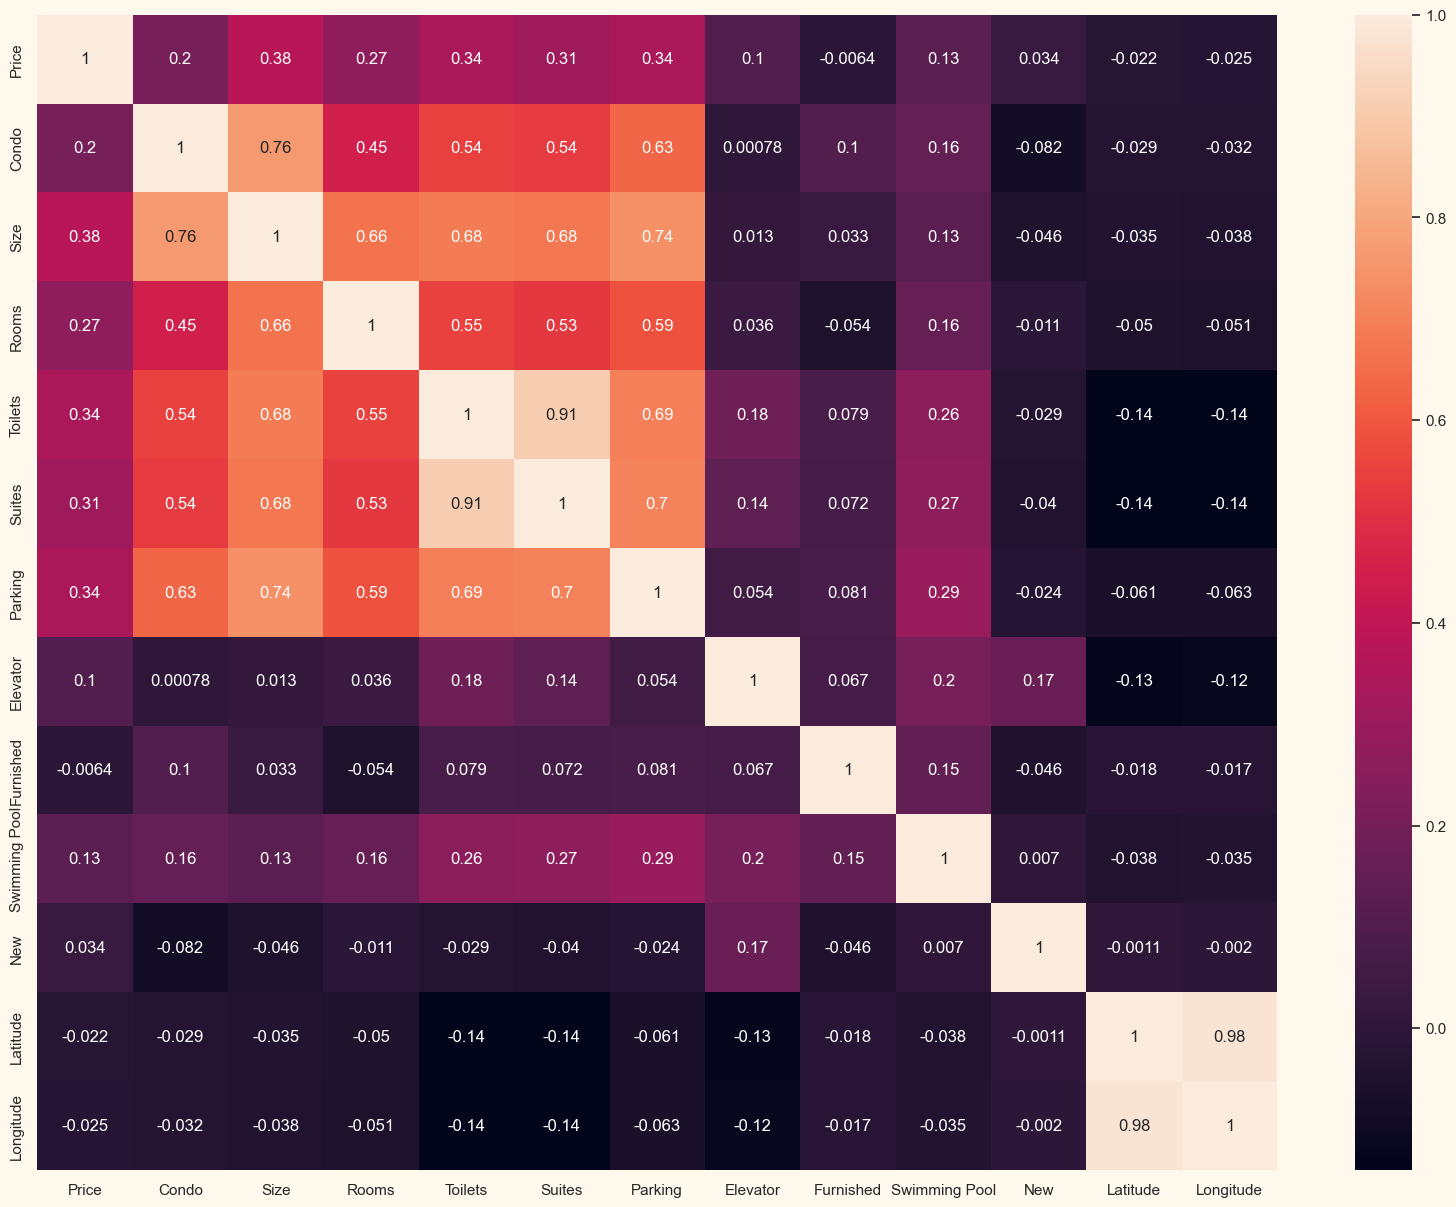

In [196]:
# correlação entre variáveis

plt.figure(figsize=(20,15))
sns.heatmap(df_num.corr(), annot=True)

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 3000x2000 with 0 Axes>

<Figure size 640x480 with 0 Axes>

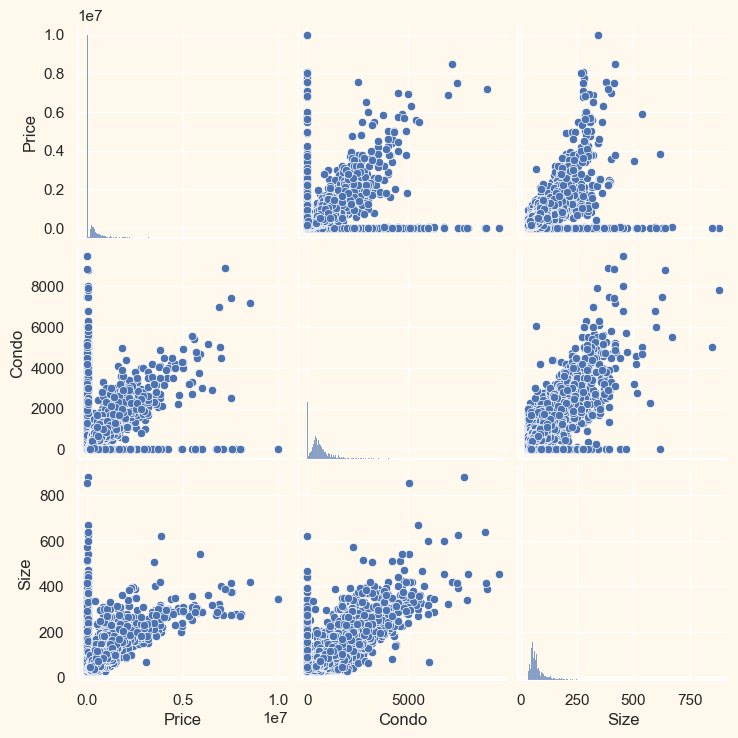

In [197]:
plt.figure(figsize=(30,20))

#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
To_Plot = ['Price', 'Condo', 'Size']
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(df_num[To_Plot], palette= (["#682F2F","#F3AB60"]))
#Taking hue 
plt.show()

#### Variáveis categóricas

In [198]:
df_cat.columns

Index(['District', 'Negotiation Type', 'Property Type'], dtype='object')

In [199]:
df_cat['Property Type'].value_counts()

apartment    13640
Name: Property Type, dtype: int64

In [200]:
df_cat['Negotiation Type'].value_counts()

rent    7228
sale    6412
Name: Negotiation Type, dtype: int64

In [201]:
df_cat['District'].value_counts()

Moema/São Paulo              293
Mooca/São Paulo              288
Brás/São Paulo               255
Brooklin/São Paulo           250
Bela Vista/São Paulo         250
                            ... 
Jardim São Luis/São Paulo     44
São Rafael/São Paulo          44
Grajaú/São Paulo              37
São Domingos/São Paulo        35
Perus/São Paulo               30
Name: District, Length: 96, dtype: int64

In [202]:
# Bairros

print('Quantidade de bairros: {}'.format(df_cat['District'].nunique()))

Quantidade de bairros: 96


##### Data Cleaning

In [203]:
# Removendo a variável sale
df = df[df['Negotiation Type'] == 'rent']

# Separando em variáveis categóricas e numéricas novamente
df_num = df.select_dtypes(include='number')
df_cat = df.select_dtypes(exclude='number')

#### Nova análise com os dados filtrados

In [204]:
df_num.describe()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude
count,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000
mean,3077.669065,825.194798,89.486165,2.304234,2.105562,1.024488,1.452269,0.299806,0.172939,0.487963,0.000830,-22.032278,-43.500873
std,3522.830284,835.621937,63.976416,0.829108,0.998162,0.884241,0.889535,0.458205,0.378220,0.499890,0.028802,5.962534,11.675070
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-46.749039,-58.364352
25%,1350.000000,395.750000,52.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-23.598066,-46.689788
50%,2000.000000,595.000000,67.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-23.555869,-46.644793
75%,3300.000000,990.000000,100.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,-23.522756,-46.585110
max,50000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000


<AxesSubplot:>

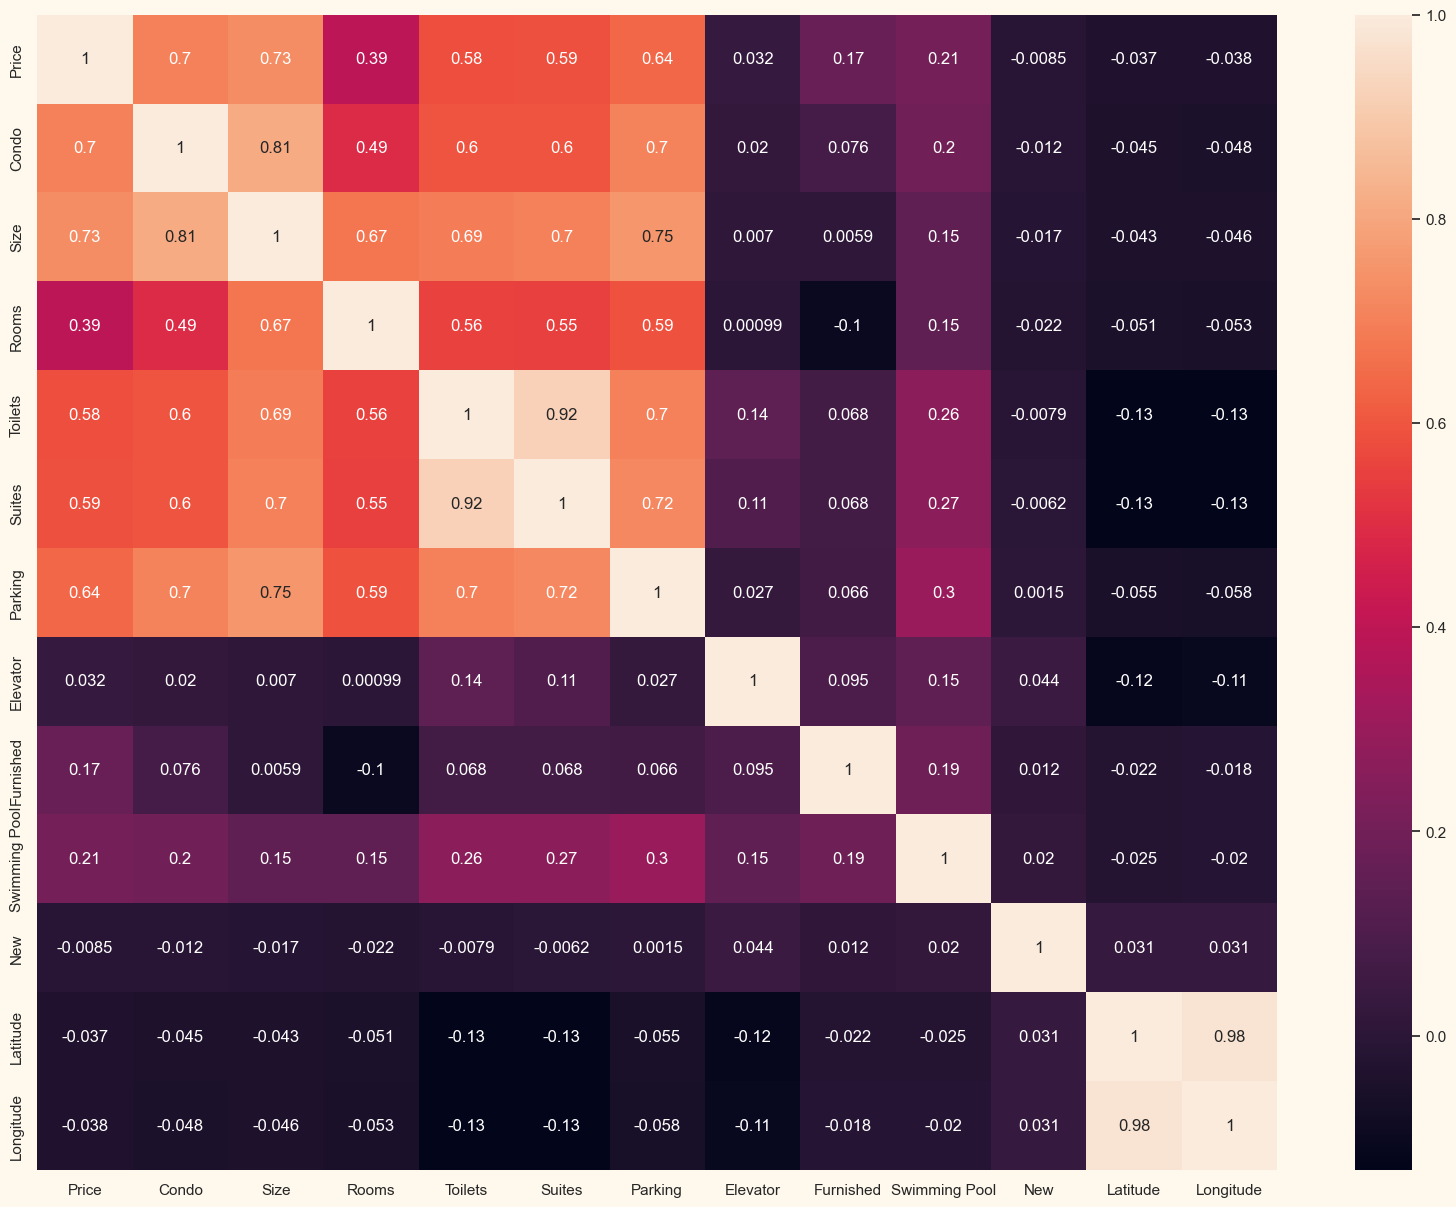

In [205]:
# Matriz de correlação

plt.figure(figsize=(20,15))
sns.heatmap(df_num.corr(), annot=True)

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 3000x2000 with 0 Axes>

<Figure size 640x480 with 0 Axes>

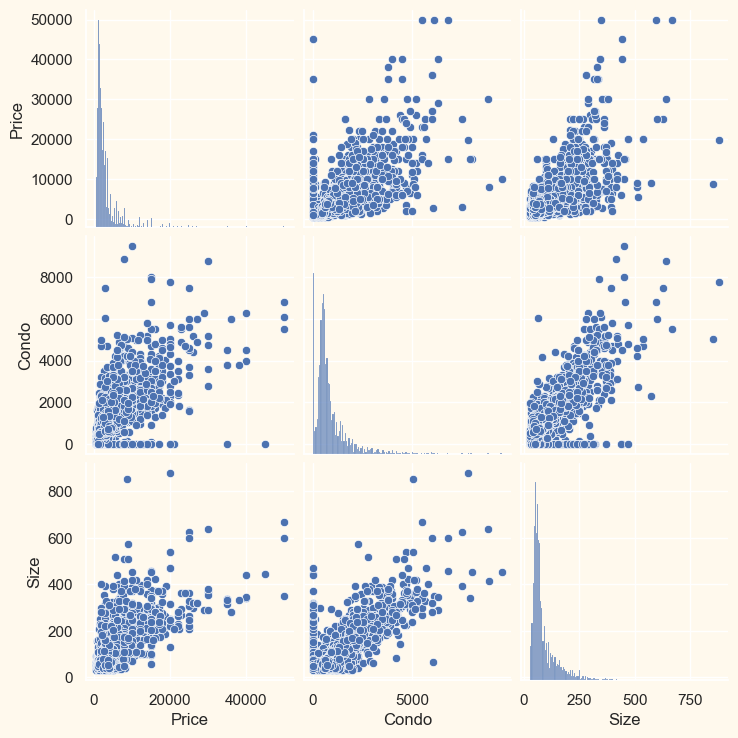

In [206]:
plt.figure(figsize=(30,20))

#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
To_Plot = ['Price', 'Condo', 'Size']
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(df_num[To_Plot], palette= (["#682F2F","#F3AB60"]))
#Taking hue 
plt.show()

#### Variável Alvo

<AxesSubplot:ylabel='Price'>

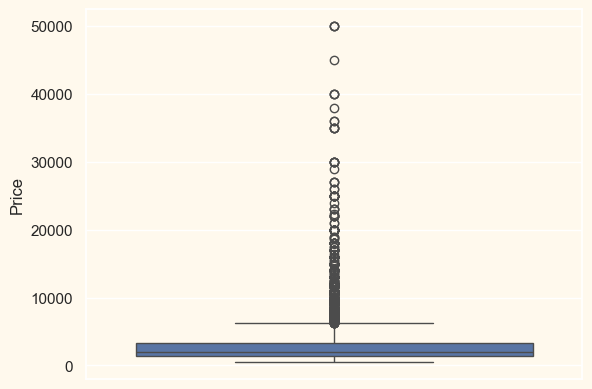

In [207]:
sns.boxplot(df_num['Price'])

#### Data Cleaning

In [208]:
# Removendo outliers
df_num[df_num['Price'] < 7000].shape[0] / df_num.shape[0]

df = df[df['Price'] < 7000]

df_cat = df.select_dtypes(exclude='number')
df_num = df.select_dtypes(include='number')

<AxesSubplot:ylabel='Price'>

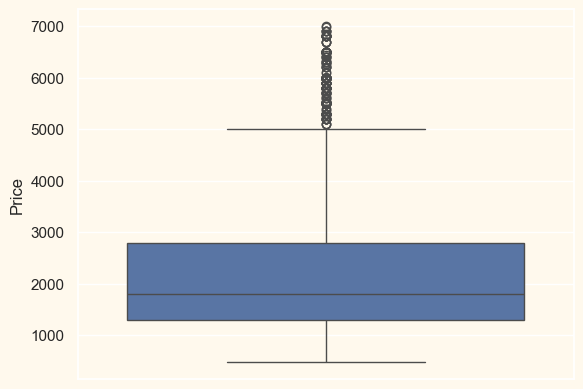

In [209]:
sns.boxplot(df_num['Price'])

<AxesSubplot:xlabel='Price', ylabel='Count'>

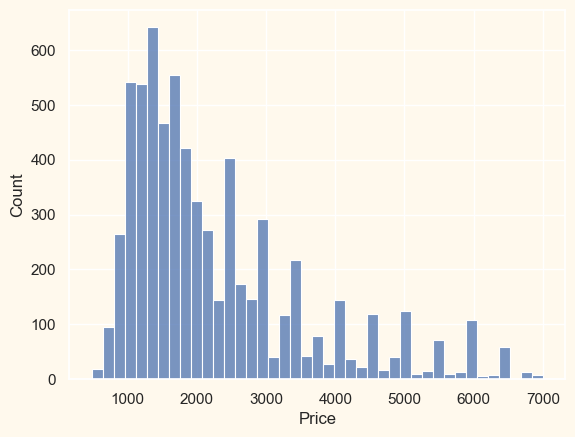

In [210]:
sns.histplot(df_num['Price'])

In [292]:
df_cat.columns

Index(['District', 'Negotiation Type', 'Property Type'], dtype='object')

# CRIAÇÃO DE VARIÁVEIS

In [273]:
# Distância do centro
latitude_centro = -23.5489
longitude_centro = -46.6388

centro = (latitude_centro, longitude_centro)
df_num['distancia_centro'] = df_num.apply(lambda row: geodesic((row['Latitude'], row['Longitude']), centro).km, axis=1)

In [ ]:
# Verificando se as distâncias fazem sentido

df_num['distancia_centro'].max()

5669.87921359065

In [310]:
# Selecionando os dados que não contem latitude ou longitude zerados
df_lat_long = df[(df['Latitude'] != 0) & (df['Longitude'] != 0)]

# Agrupando por distrito e calculando a média
media_localizacao = df_lat_long.groupby('District')['Latitude', 'Longitude'].mean().reset_index()

# Definindo os mapas
map_longitude = media_localizacao[['District', 'Longitude']]
map_latitude = media_localizacao[['District', 'Latitude']]

# Aplicando a média calculada para os dados faltantes
df['Longitude_new'] = df['Longitude'].apply(lambda x: map_longitude[x] if x == 0 else x)
df['Latitude_new'] = df['Latitude'].apply(lambda x: map_latitude[x] if x == 0 else x)


KeyError: 0.0

In [306]:
media_localizacao

,District,Latitude,Longitude
0,Alto de Pinheiros/São Paulo,-23.852905,-46.469761
1,Anhanguera/São Paulo,-23.523211,-46.654322
2,Aricanduva/São Paulo,-23.634219,-46.595097
3,Artur Alvim/São Paulo,-23.611456,-46.539133
4,Barra Funda/São Paulo,-23.523828,-46.660942
...,...,...,...
89,Vila Matilde/São Paulo,-23.592031,-46.566533
90,Vila Olimpia/São Paulo,-23.596630,-46.683794
91,Vila Prudente/São Paulo,-23.780412,-46.384670
92,Vila Sônia/São Paulo,-23.598765,-46.731588


# CLUSTERING

In [212]:
# Definindo o dataset
df_kmeans = df_num.drop(columns=['Price', 'New'], axis=1)

In [213]:
# Padronizando as features
df_kmeans_sc = StandardScaler().fit_transform(df_kmeans)
df_kmeans_sc = pd.DataFrame(df_kmeans_sc)
df_kmeans_sc.columns = df_kmeans.columns

In [214]:
# Definindo o modelo
kmeans_sp = KMeans(n_clusters=3, random_state=42)
clusters = kmeans_sp.fit_predict(df_kmeans_sc)
clusters = pd.DataFrame(clusters)
clusters.columns = ['Cluster']

In [215]:
# Método Elbow
cluster_range = range(2, 10)
silhouette_scores = []

for i in cluster_range:
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(df_kmeans_sc)
    silhouette_scores.append(silhouette_score(df_kmeans_sc, labels))

Text(0, 0.5, 'silhouette_score')

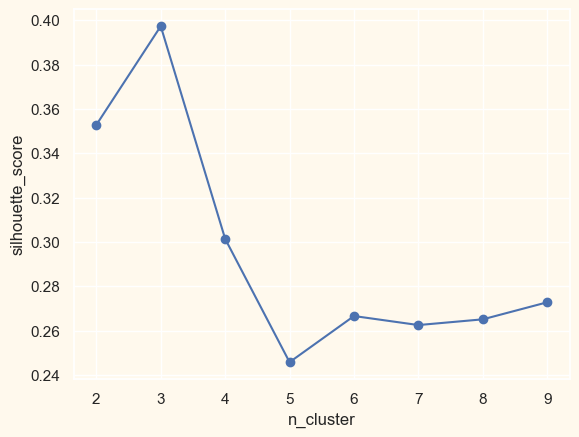

In [216]:
# Analise gráfica

plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('n_cluster')
plt.ylabel('silhouette_score')

In [ ]:
# Incluindo os clusters no dataset

df_num = pd.concat([df_num.reset_index(drop=True), clusters.reset_index(drop=True)], axis=1)
df_kmeans_sc = pd.concat([df_kmeans_sc.reset_index(drop=True), clusters.reset_index(drop=True)], axis=1)

<AxesSubplot:xlabel='Price', ylabel='Condo'>

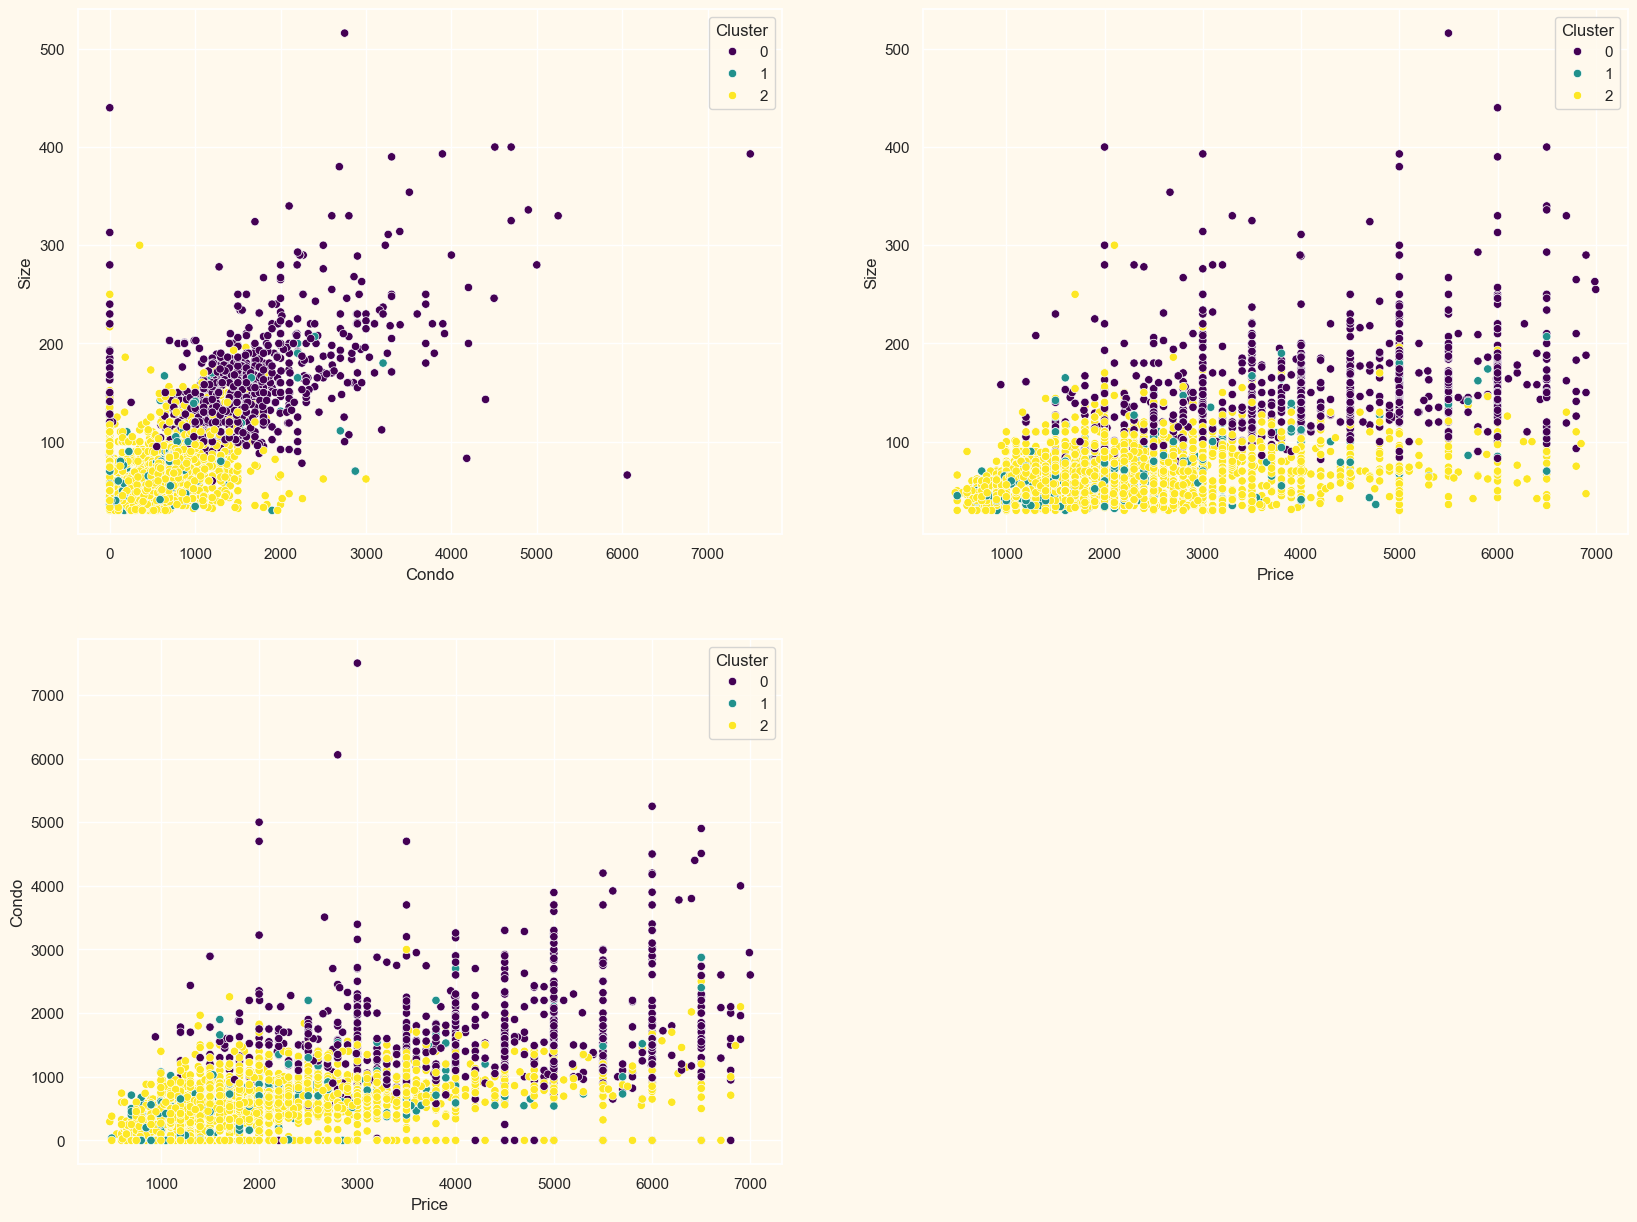

In [232]:
# Visualizando os clusters

plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
sns.scatterplot(x='Condo', y='Size', hue='Cluster', palette='viridis', data=df_num)

plt.subplot(2,2,2)
sns.scatterplot(x='Price', y='Size', hue='Cluster', palette='viridis', data=df_num)

plt.subplot(2,2,3)
sns.scatterplot(x='Price', y='Condo', hue='Cluster', palette='viridis', data=df_num)

# ANALISE PCA

In [237]:
# Preparando o dataframe

df_pca = df_kmeans_sc.drop(columns=['Cluster'], axis=1)

In [ ]:
# Teste qui quadrado - Teste de esferecidade de Barlett

qui, p_value = calculate_bartlett_sphericity(df_pca)

In [240]:
# Teste de hipótese p-value: Hipótese nula > p-value inferior a 0.05, não há diferença entre a matriz de correlação
# e sua matriz identidade, nesse caso não há necessidade de análise PCA. Hipótese alternativa, há diferenças, nesse
# caso uma analise PCA conseguiria capturar a variabilidade, através dos fatores, das variáveis originais

if p_value < 0.05:
    print('p_valor: {}, rejeita-se a hipótese nula, há diferença'.format(round(p_value), 2))
elif p_value > 0.05:
    print('p_valor: {}, aceita-se a hipótese nula, não há diferença'.format(round(p_value), 2))

p_valor: 0, rejeita-se a hipótese nula, há diferença


In [241]:
df_pca.shape[1]

11

In [242]:
# Definindo a análise PCA

fat = FactorAnalyzer(n_factors=11, method='principal', rotation=None).fit(df_pca)

In [245]:
# Obtendo os autovalores

autovalores = fat.get_eigenvalues()[0]
df_autovalores = pd.DataFrame(autovalores)
print(df_autovalores)

           0
0   4.111455
1   1.983284
2   1.295403
3   0.939993
4   0.777933
5   0.712191
6   0.525610
7   0.346268
8   0.186871
9   0.095802
10  0.025191


In [252]:
# Critério da raiz latente (Kaizer), seleciona-se os autovalores > 1: a premissa é que devemos selecionar
# autovalores que possuam mais informação que a variavel original individual

fat = FactorAnalyzer(n_factors=4, method='principal', rotation=None).fit(df_pca)

In [ ]:
# Obtendo os autovalores, variâncias e variâncias acumuladas

autovalores_fatores = fat.get_factor_variance()
tabela_eigen = pd.DataFrame(autovalores_fatores)
tabela_eigen.index = ['Autovalores', 'Variância', 'Variância Acumulada']
tabela_eigen.columns = [f'Fator {i+1}' for i, v in enumerate(tabela_eigen.columns)]
tabela_eigen = tabela_eigen.T
print(tabela_eigen)

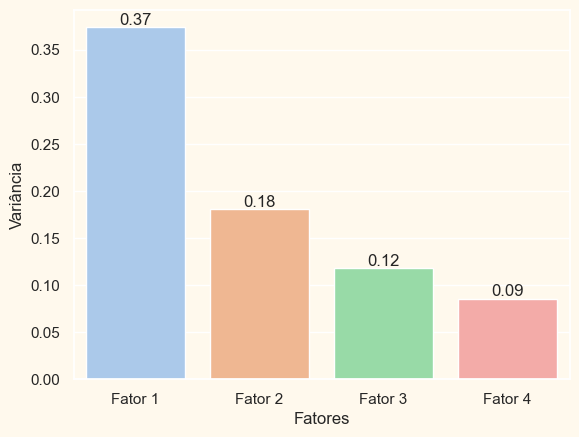

In [260]:
# Gráfico da variância dos componentes principais

ax = sns.barplot(data=tabela_eigen, y=tabela_eigen['Variância'], x=tabela_eigen.index, palette='pastel')
plt.xlabel('Fatores')
plt.ylabel('Variância')
for barra in ax.containers:
    ax.bar_label(barra, fmt='%.2f', label_type='edge')

In [264]:
# Determinando as cargas fatoriais

cargas_fatoriais = fat.loadings_
tabela_cargas = pd.DataFrame(cargas_fatoriais)
tabela_cargas.index = df_pca.columns
tabela_cargas.columns = [f'Fator {i + 1}' for i, v in enumerate(tabela_cargas.columns)]

In [268]:
# Determinando as comunalidades

comunalidade = fat.get_communalities()
tabela_comunalidade = pd.DataFrame(comunalidade)
tabela_comunalidade.columns = ['Comunalidade']
tabela_comunalidade.index = df_pca.columns

In [269]:
tabela_comunalidade

,Comunalidade
Condo,0.633735
Size,0.806828
Rooms,0.602592
Toilets,0.767969
Suites,0.740216
Parking,0.713001
Elevator,0.848546
Furnished,0.748548
Swimming Pool,0.499505
Latitude,0.984499
